In [1]:
%config IPCompleter.greedy=True

import pandas
import numpy as np
import datetime
import xarray as xr
import pickle 
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import sys
sys.path.append('/home/srvx11/lehre/users/a1400070/CEUAS/CEUAS/public/cds-backend/code')
import cds_eua3 as eua
eua.logging_set_level(30)

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
# ncfilename = '0-20200-0-00401.nc'
# data = xr.open_dataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/'+ncfilename, group='observations_table')

data = xr.open_mfdataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/0-20200*.nc', group='observations_table')
# report_id is a variable - make it into an index


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [5]:
da = data.to_dataframe()

b'U4_'


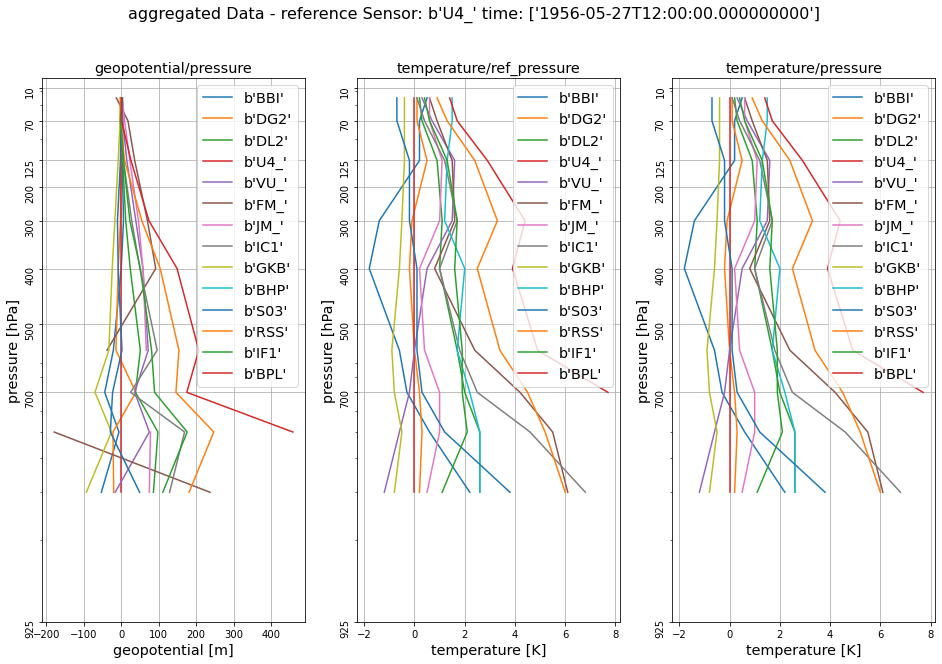

b'U4_'


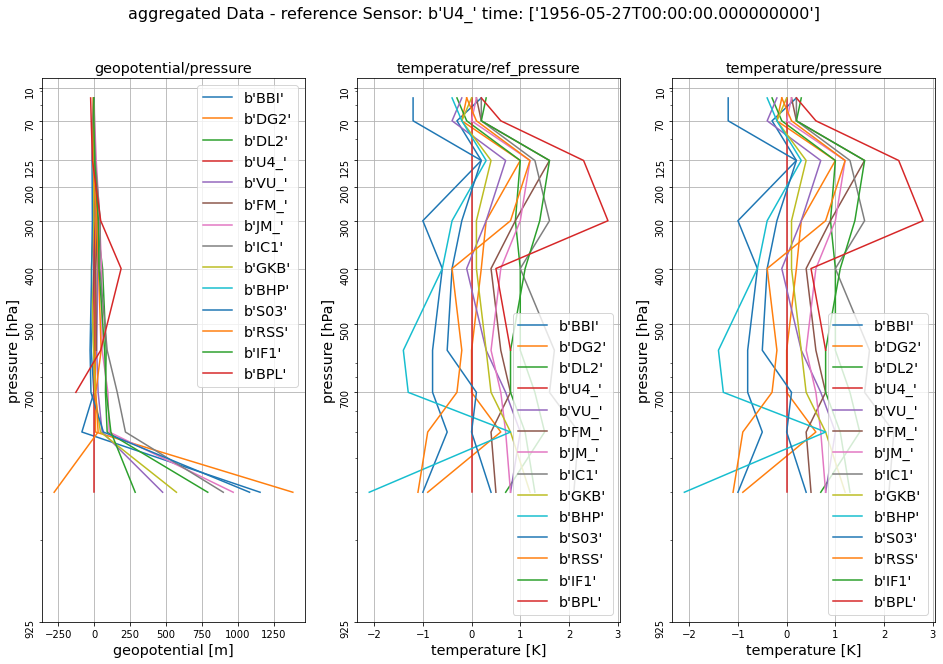

b'NA'
no 117 data


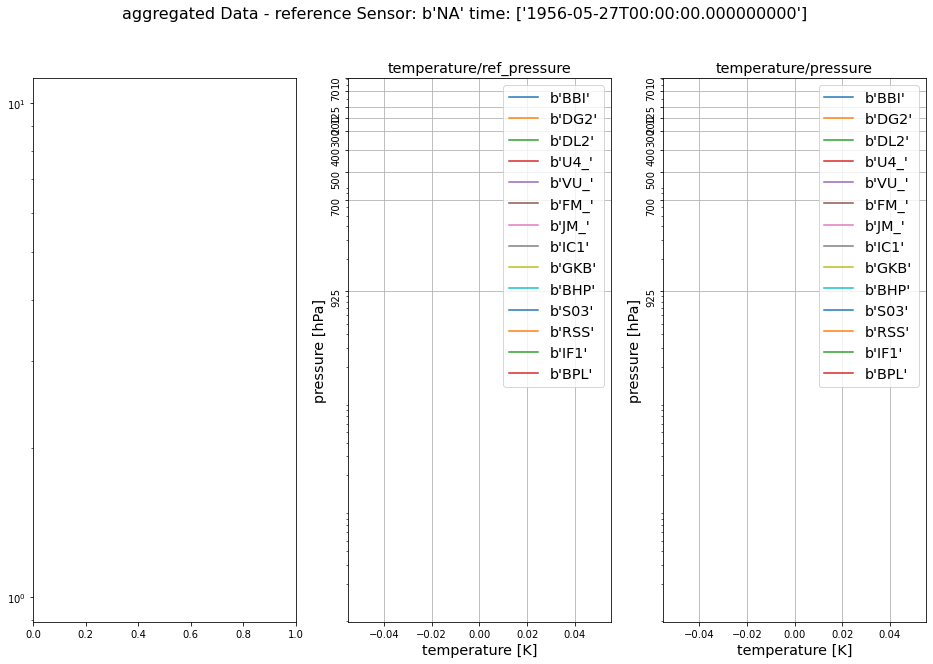

b'V16'
no 117 data


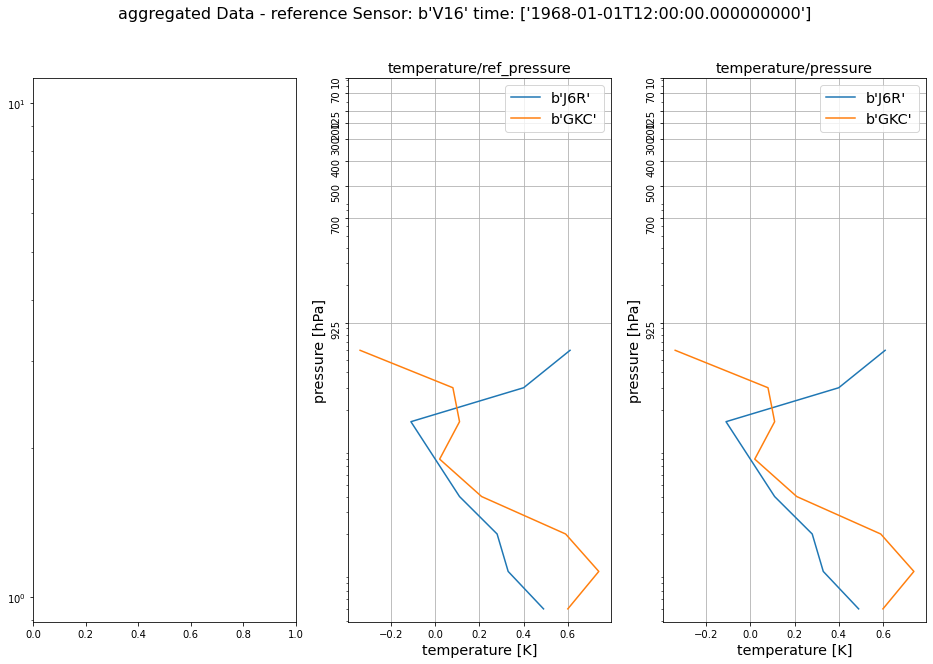

b'J6R'
no 117 data


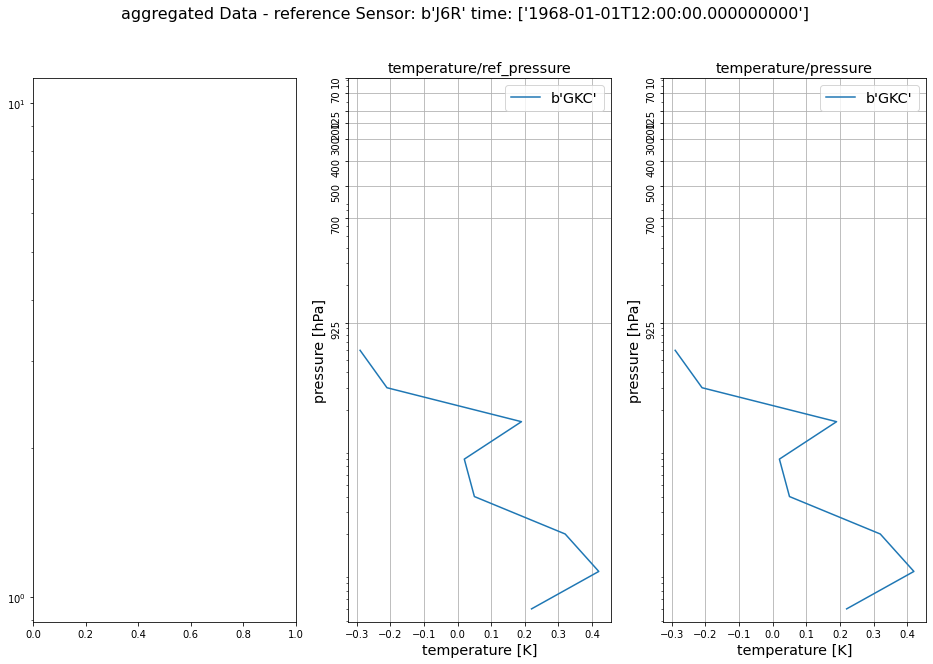

b'RKT'
no 117 data


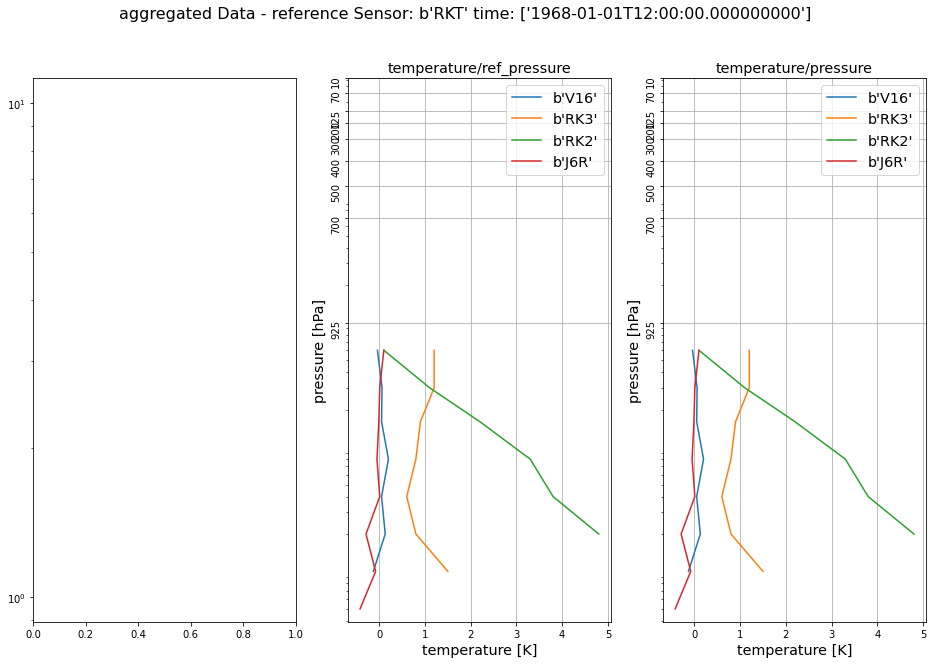

b'DA1'
no 117 data


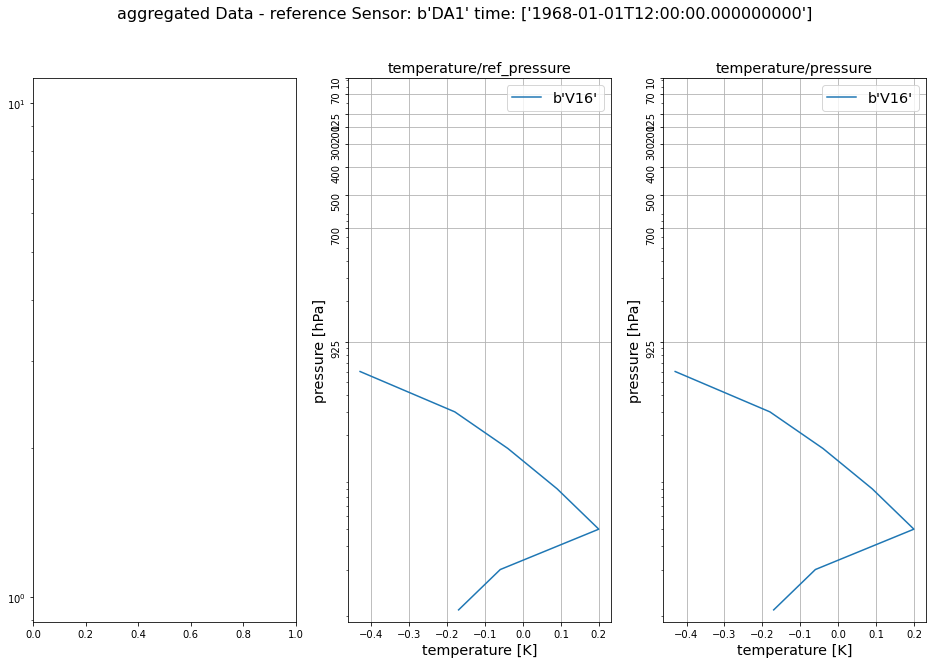

b'V16'
no 117 data


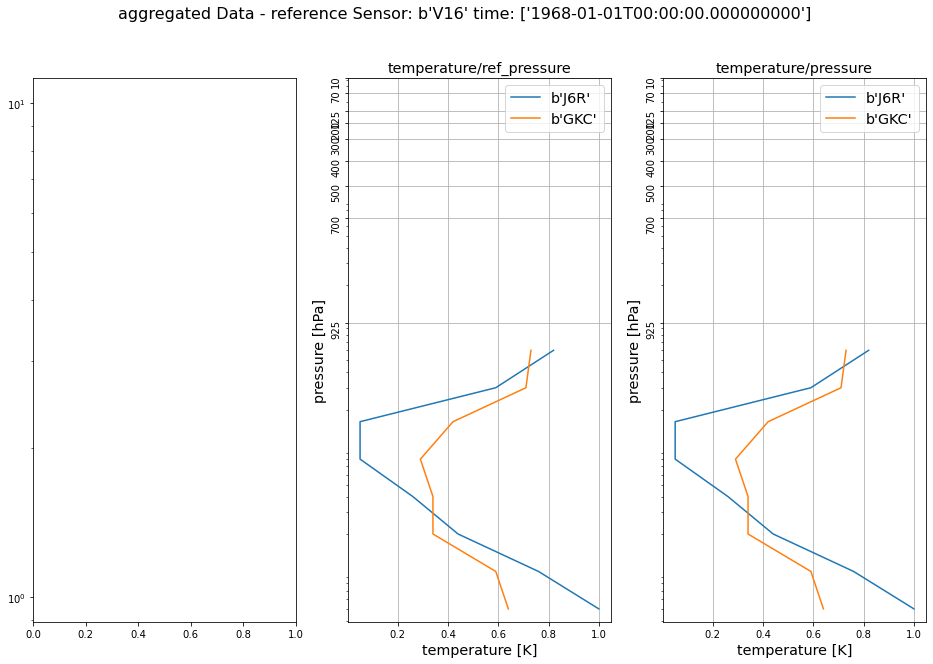

b'J6R'
no 117 data


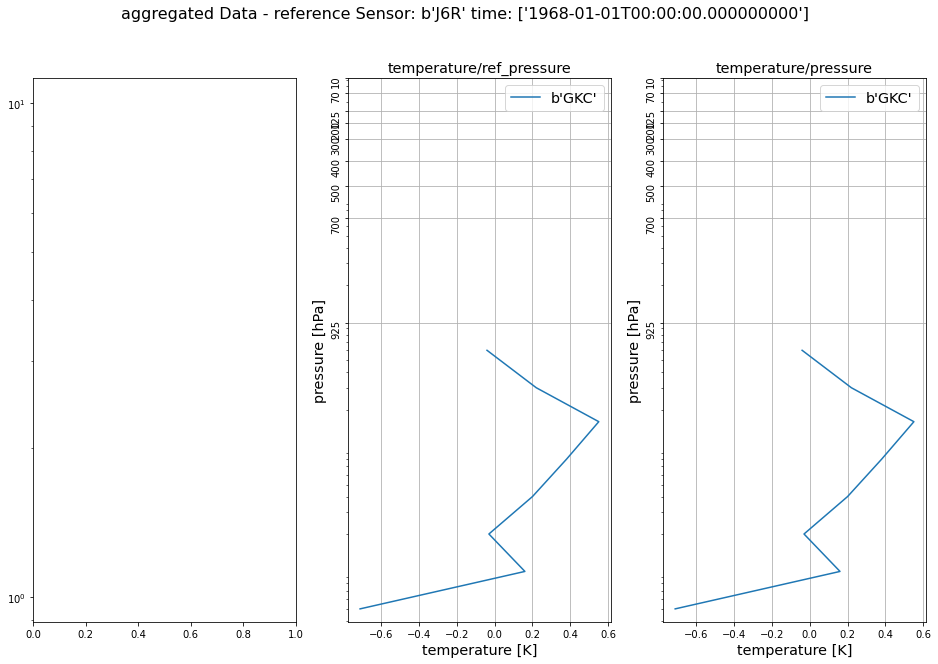

b'RKT'
no 117 data


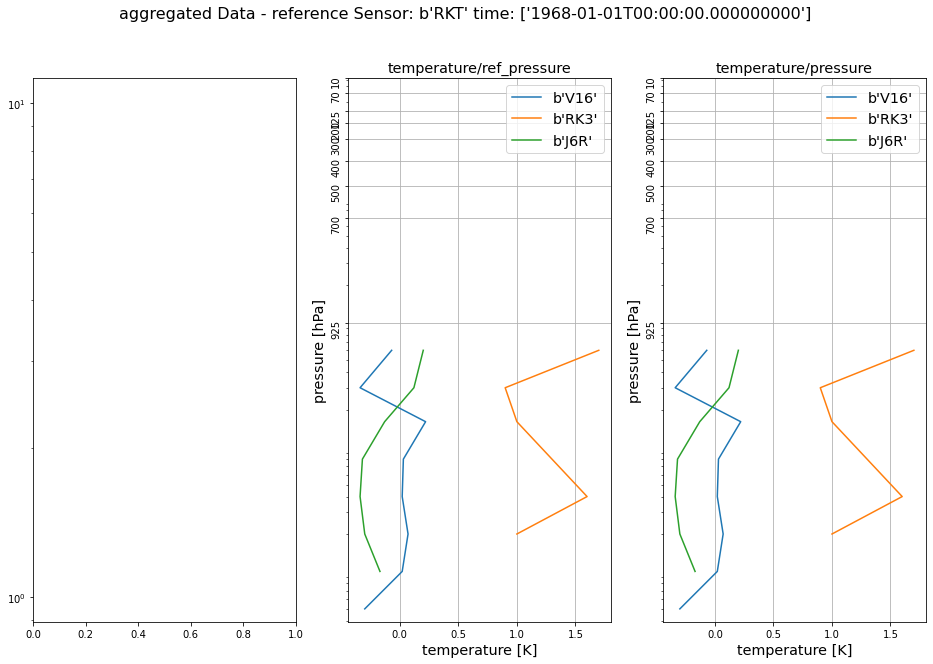

b'DA1'
no 117 data


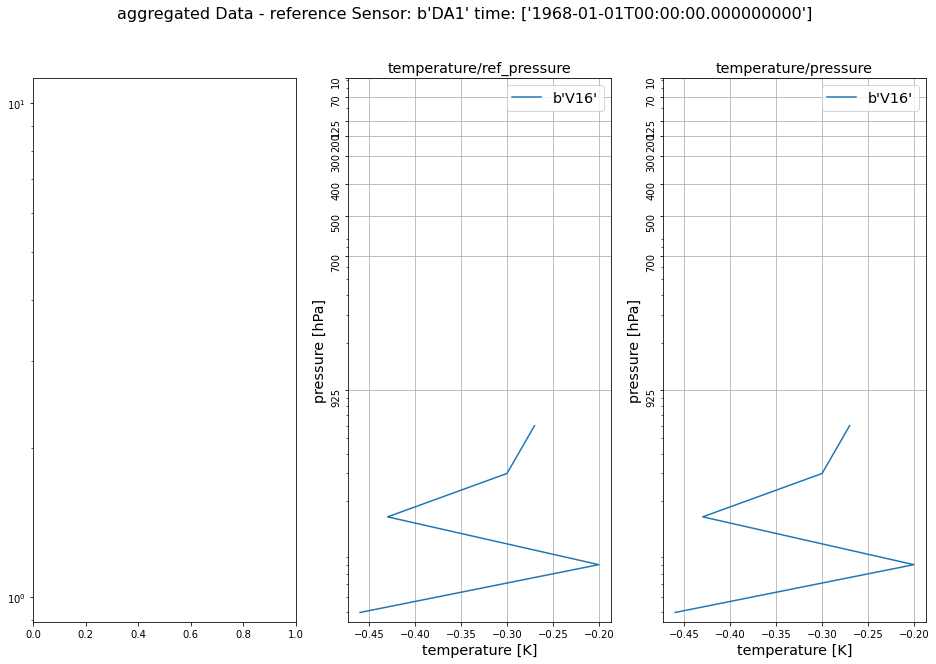

b'S07'


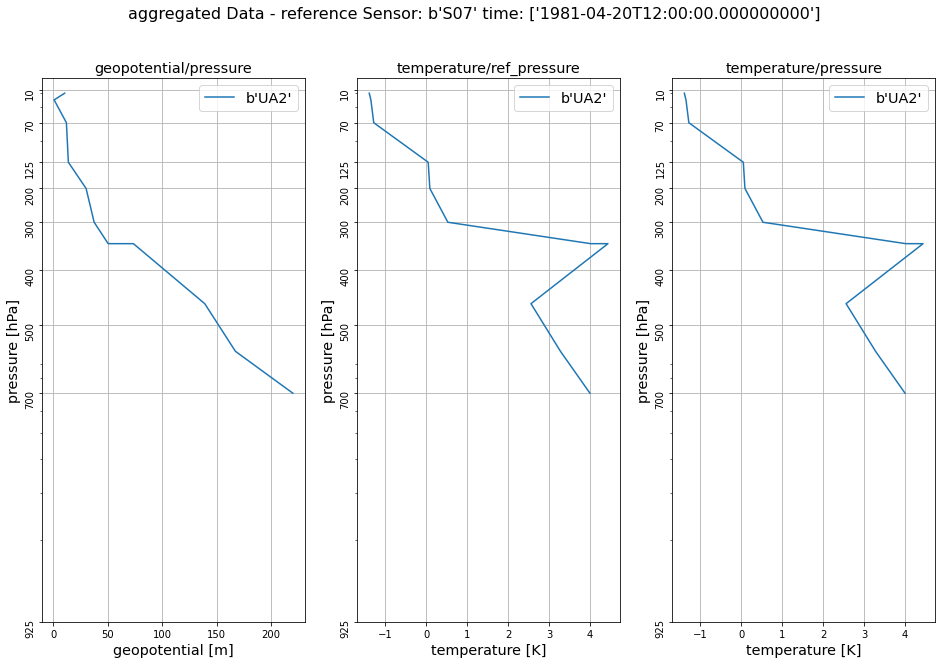

b'DG5'


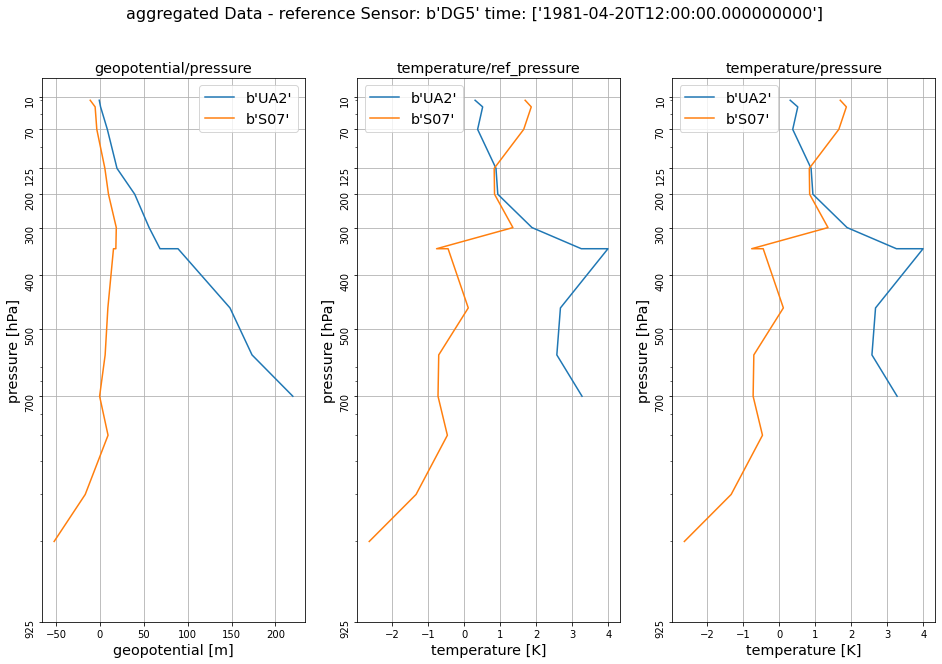

b'DAQ'


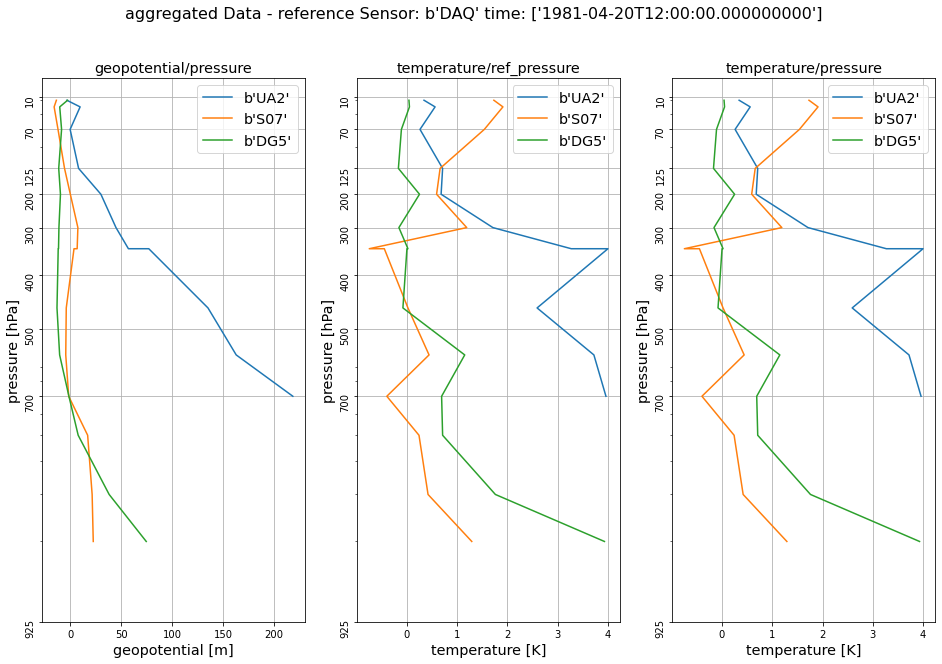

b'S09'


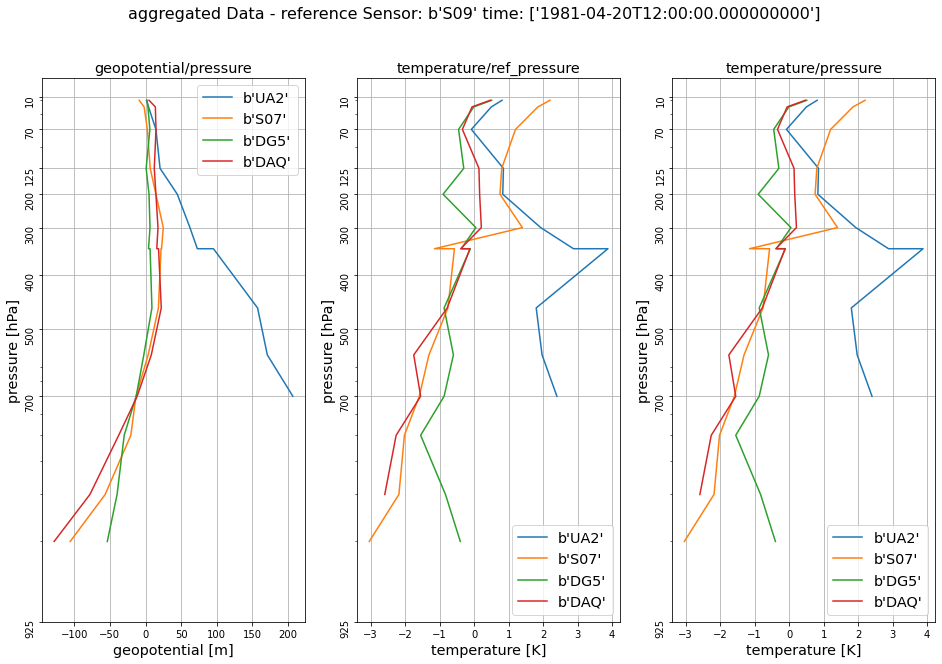

b'ST1'


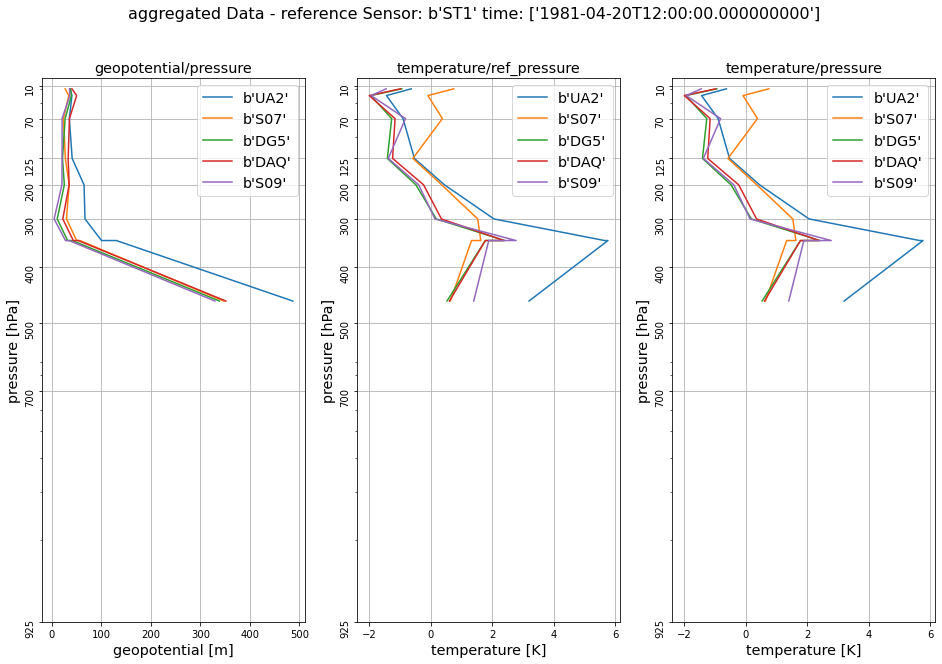

b'NA'


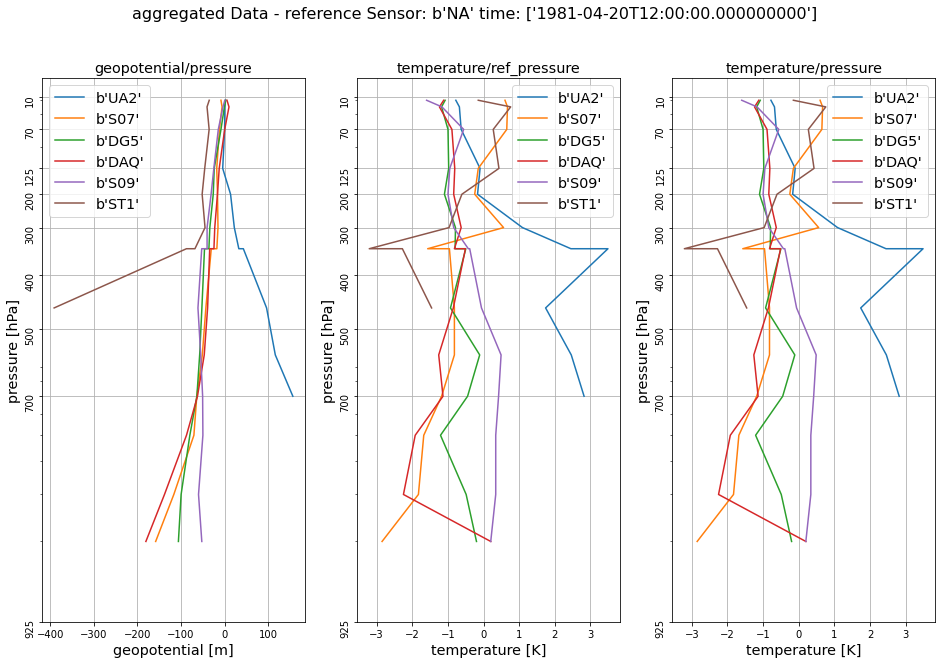

b'V2N'


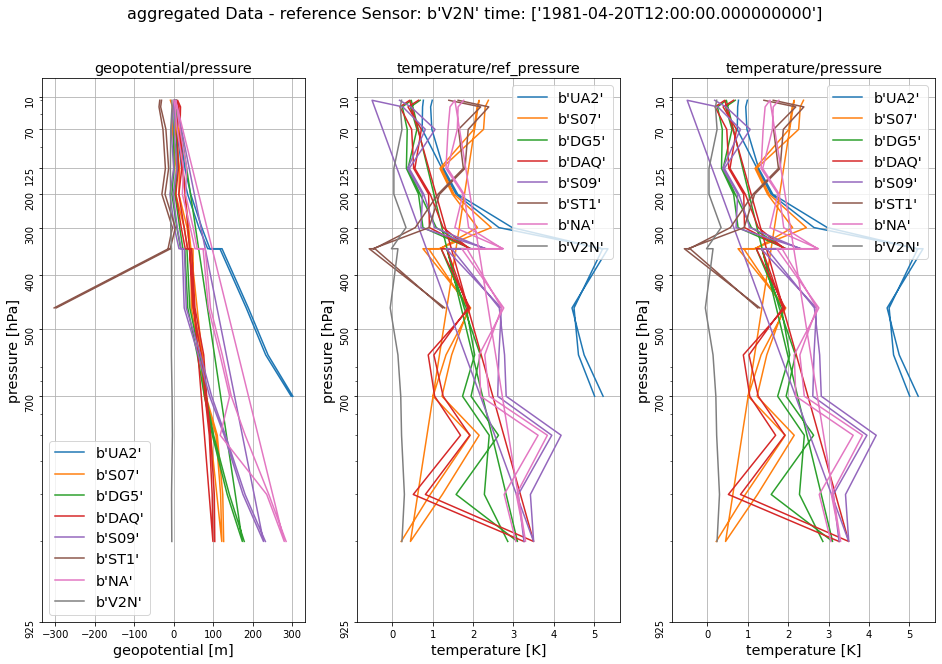

b'VHN'


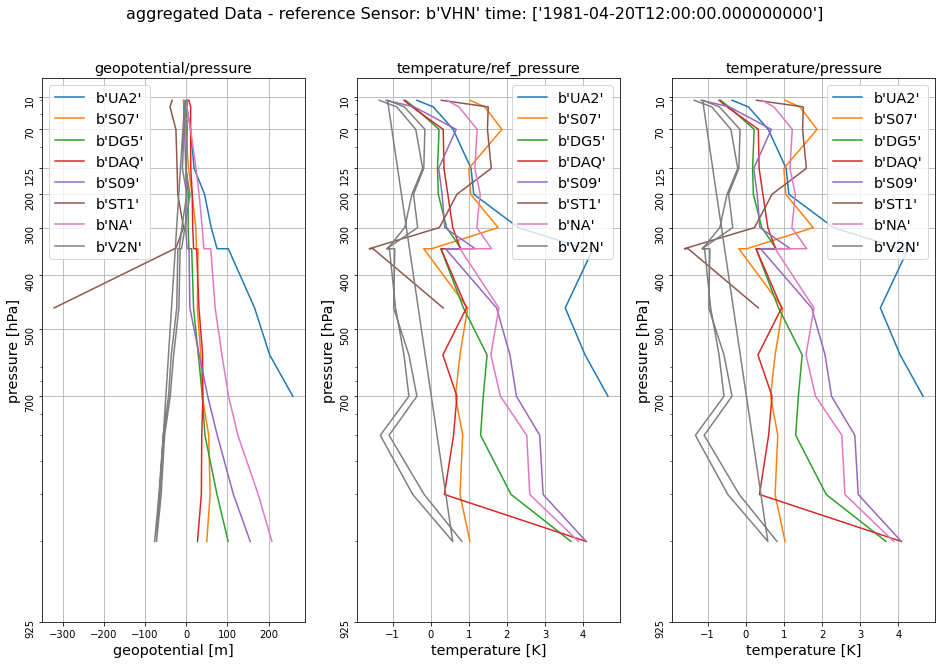

b'ZIA'


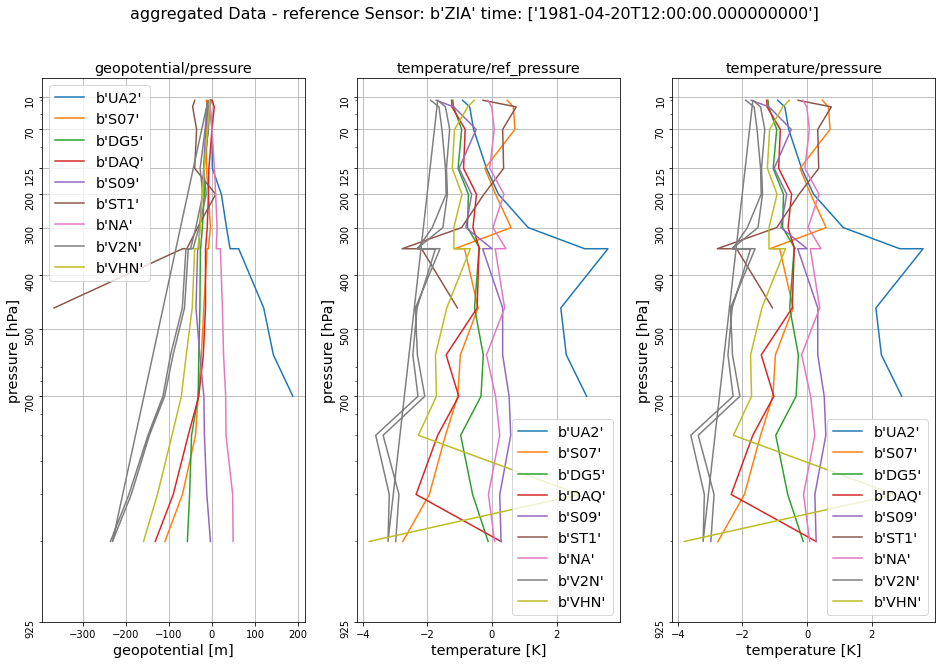

b'S07'


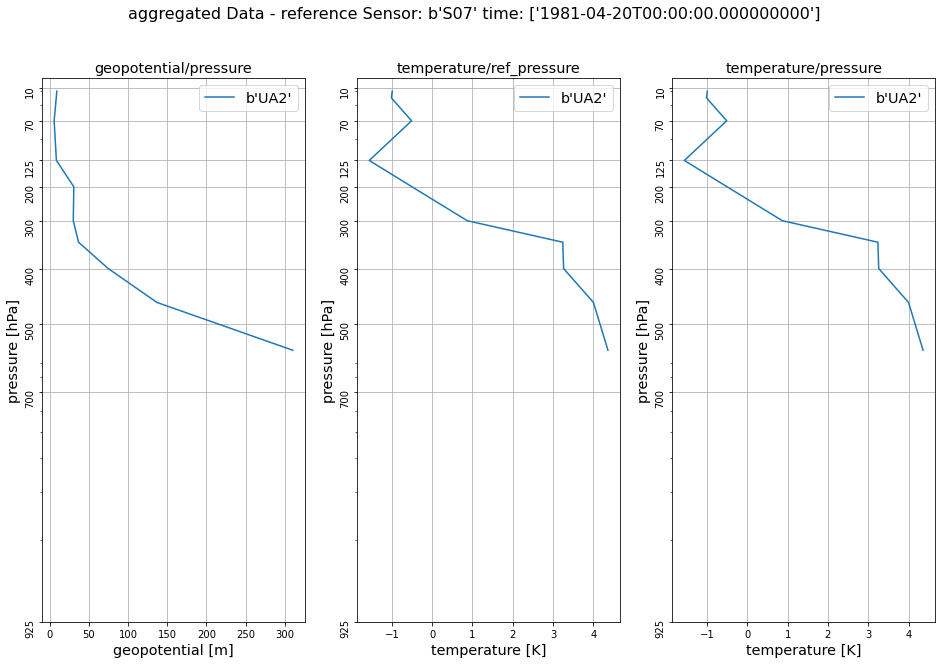

b'DG5'


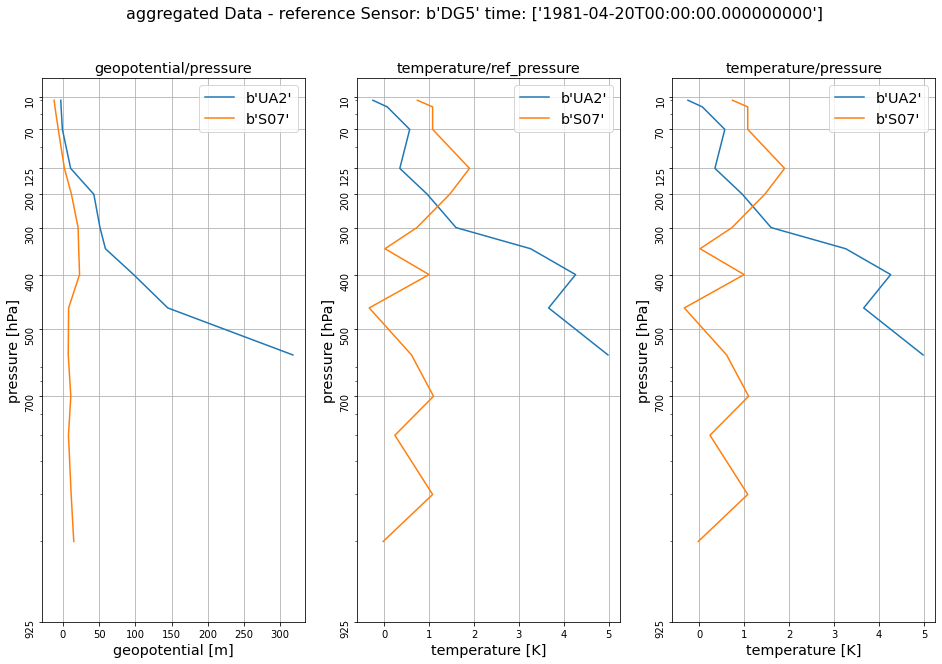

b'DAQ'


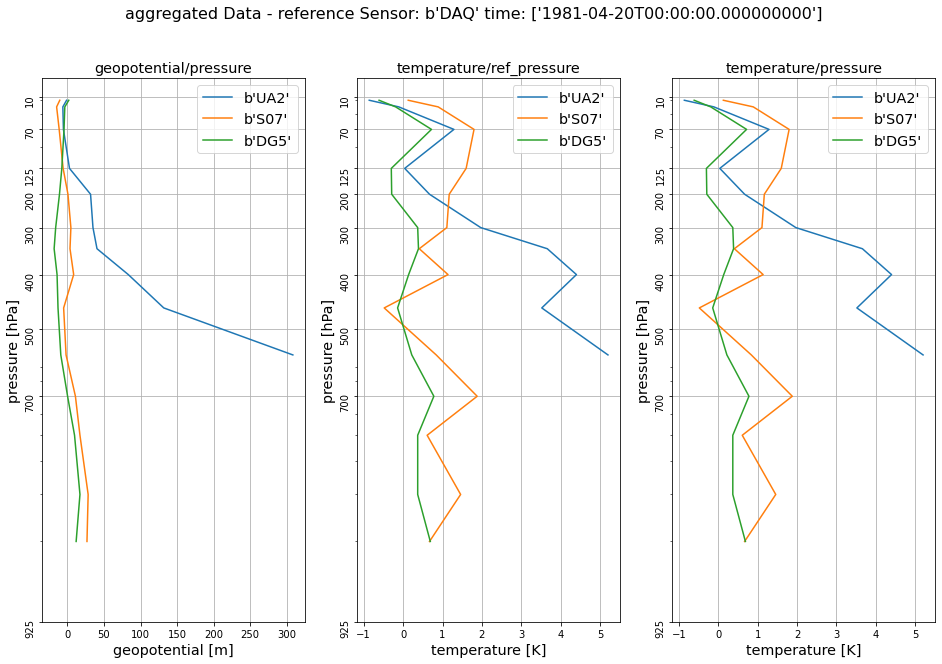

b'S09'


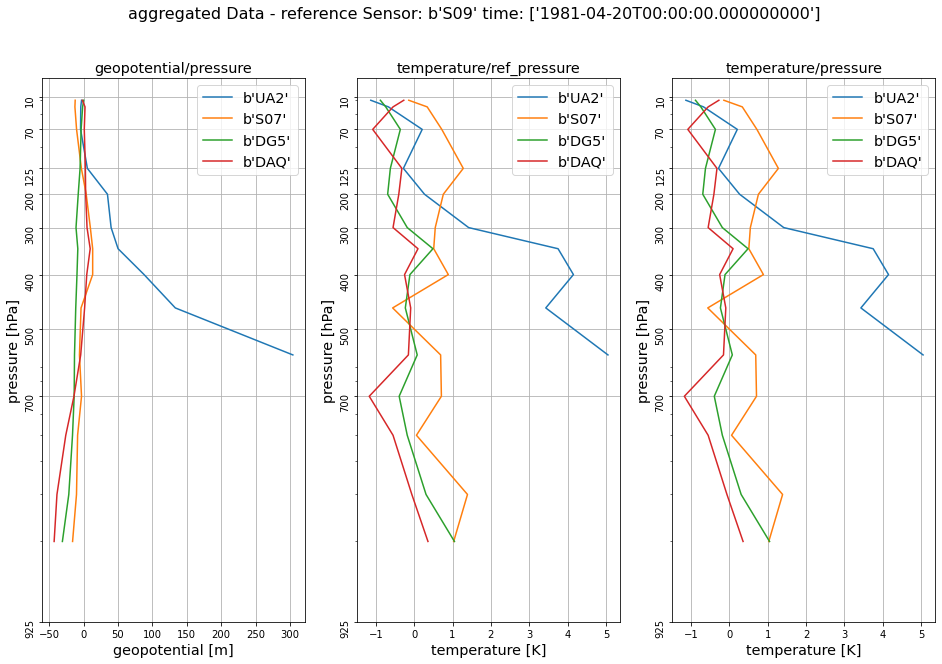

b'ST1'


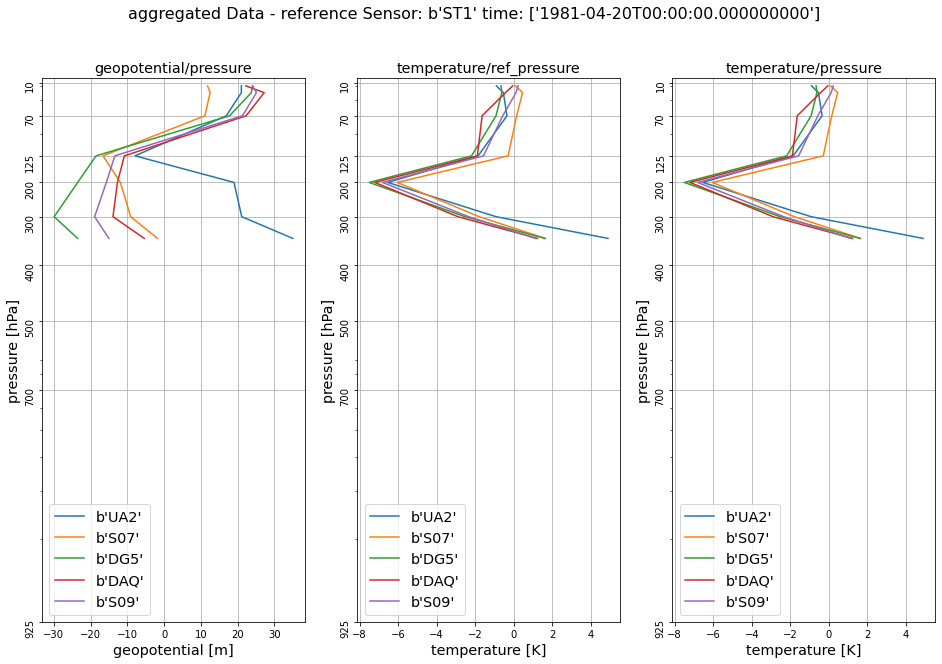

b'NA'


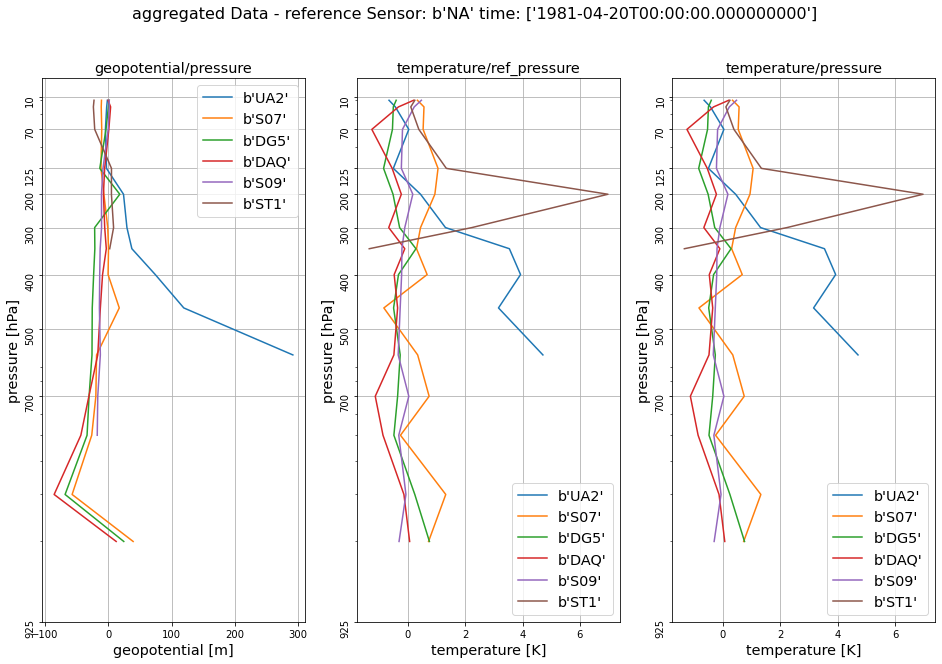

b'V2N'


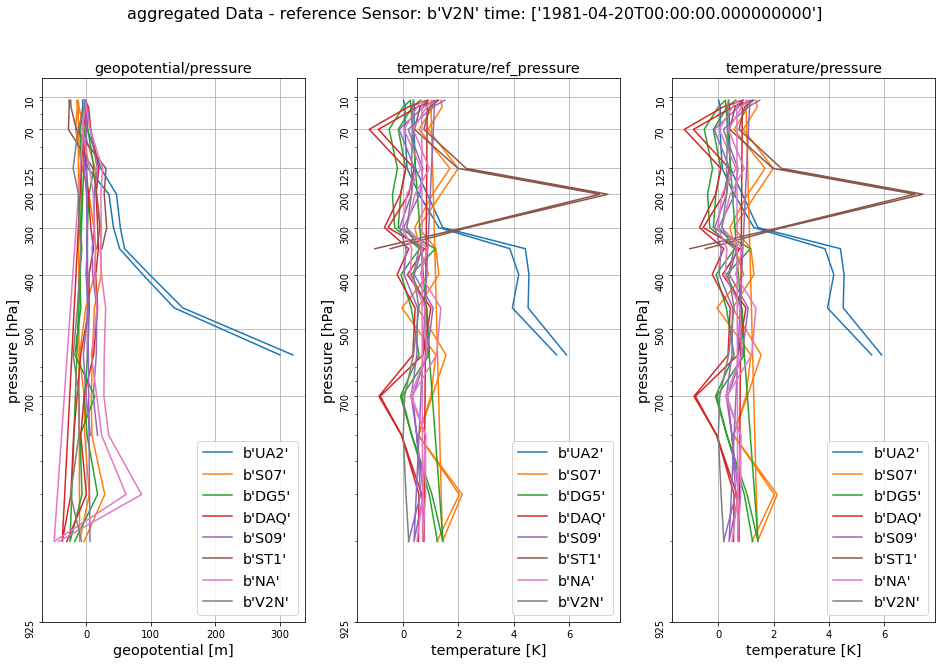

b'VHN'


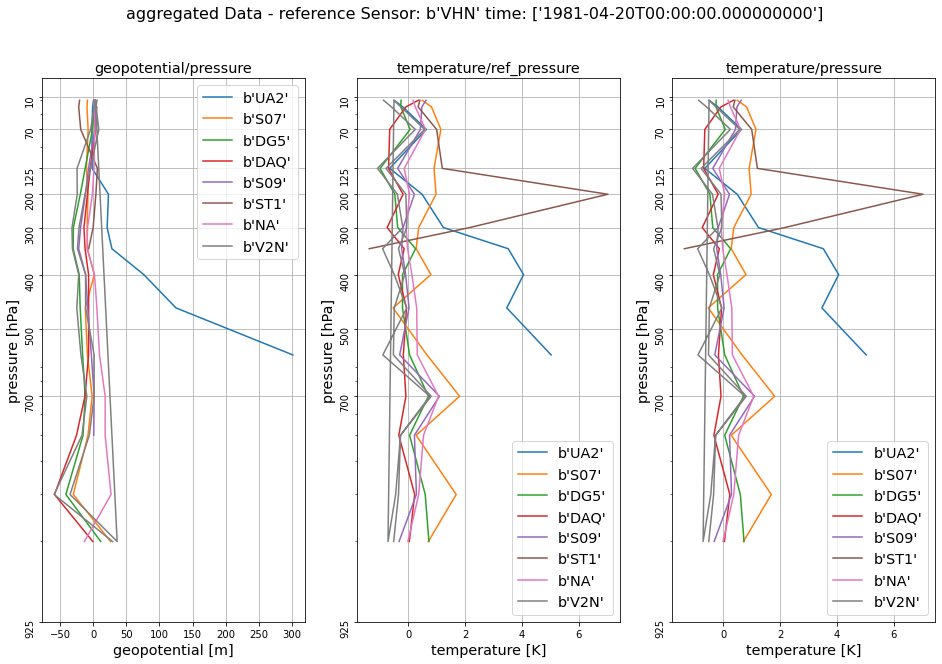

b'ZIA'


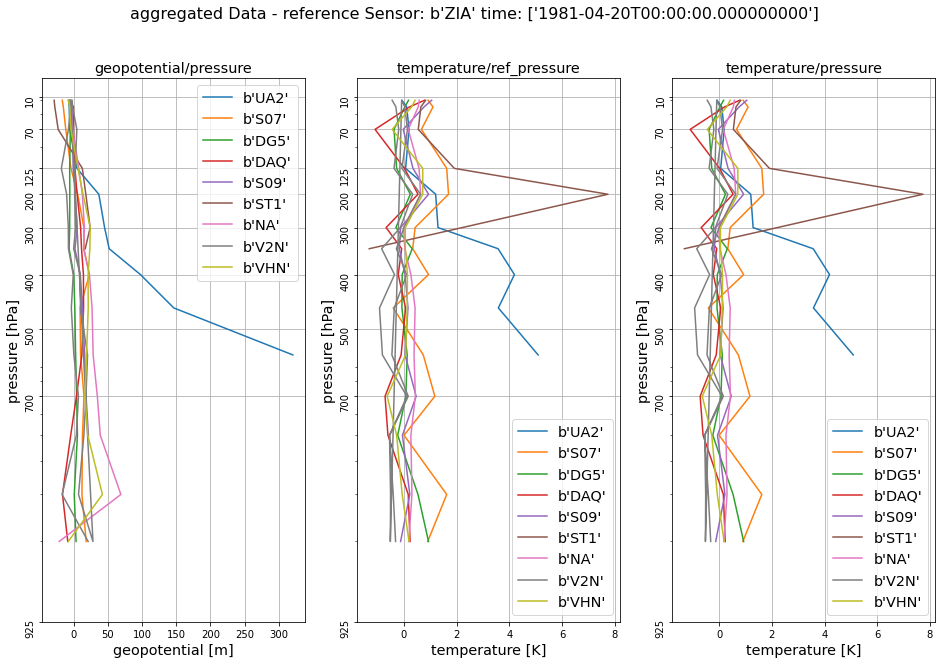

b'V2N'


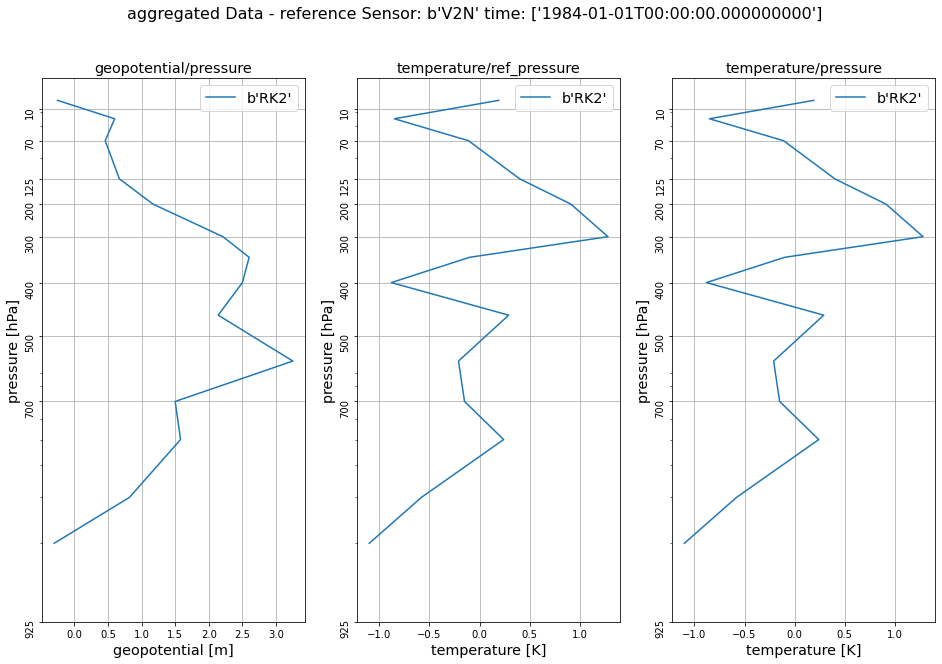

b'VHN'


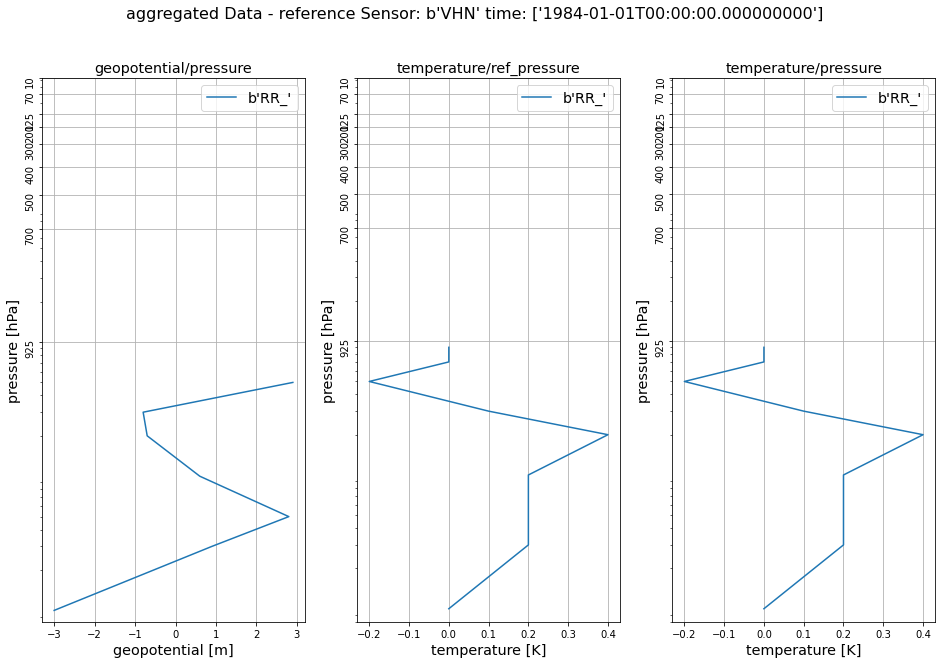

b'VHN'


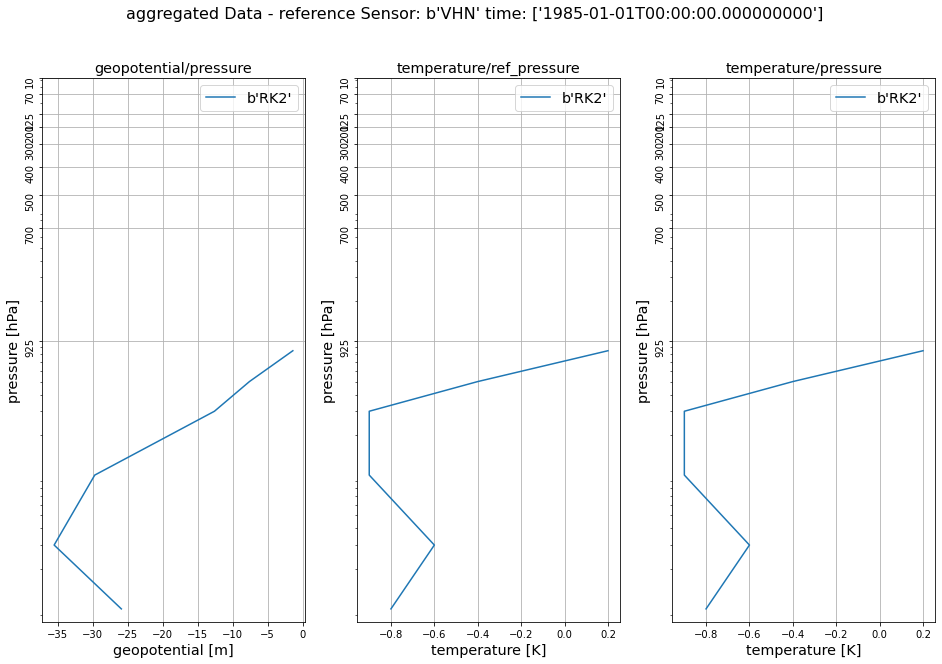

b'VHN'
no 117 data


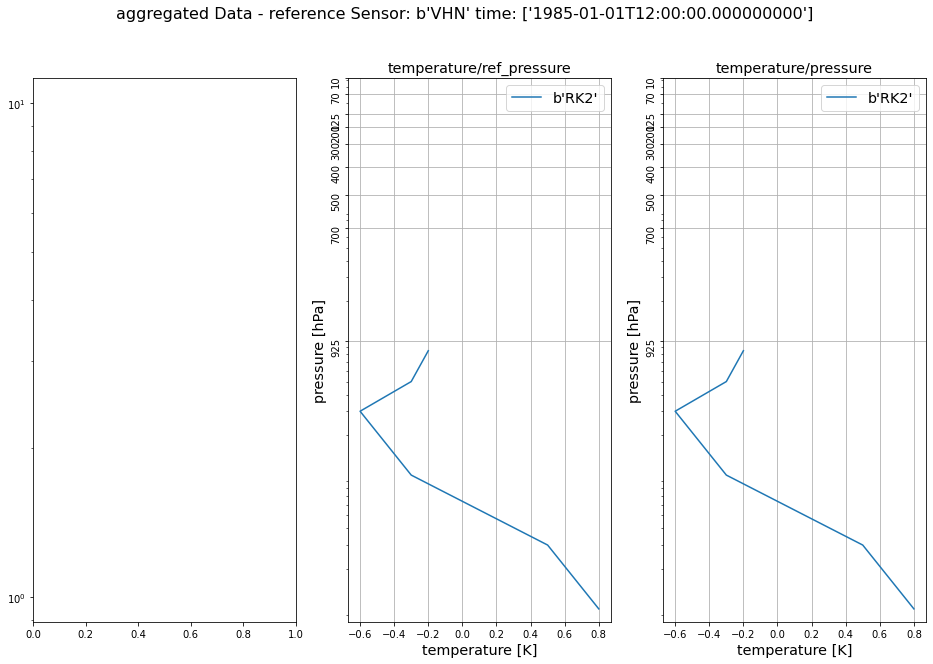

b'GK3'
no 117 data


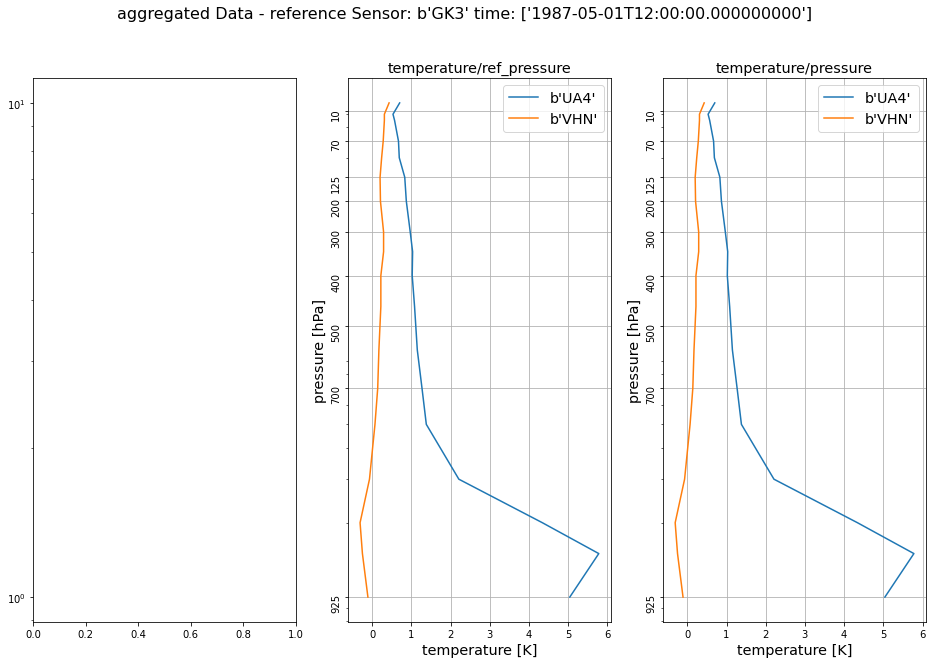

b'GK3'
no 117 data


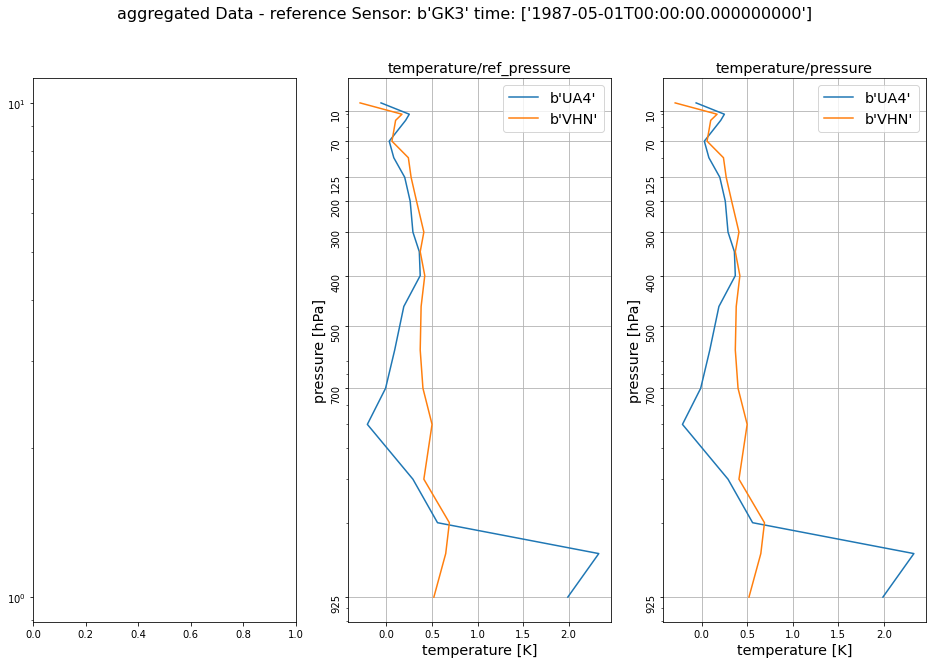

In [43]:
for i in da.date_time.drop_duplicates():
    a = da[da.date_time == i]
    for n in a.reference_sensor_id.drop_duplicates():
        b = a[a.reference_sensor_id == n]
        print(n)
#         if(a.empty): continue
        pres = []
        refpres = []
        temp = []
        geop = []
        for j in b.sensor_id.drop_duplicates():
            buffer = b[b.sensor_id == j]
            pres.append(buffer[buffer.observed_variable == 85].z_coordinate)
            refpres.append(buffer[buffer.observed_variable == 85].reference_z_coordinate)
            temp.append(buffer[buffer.observed_variable == 85].observation_value)
            geop.append(buffer[buffer.observed_variable == 117].observation_value)

        yplevs = np.array([10,70,125,200,300,400,500,700,925])*100.
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        #
        # Plotting geopotential over pressure: 
        #
        try:
            for i in range(len(temp)):
                ax1.semilogy(np.array(geop[i]), np.array(pres[i]))
            ax1.set(xlabel ='geopotential [m]', ylabel='pressure [hPa]', title='geopotential/pressure')
            ax1.legend(b.sensor_id.drop_duplicates(), loc='best')
            ax1.set_yticks(ticks=yplevs)
            ax1.set_yticklabels(map("{:.0f}".format,yplevs[::-1]/100),rotation='vertical')
            ax1.grid()
        except:
            print('no 117 data')
        #
        # Plotting pressure over temperature: reference
        #
        for i in range(len(temp)):
            ax2.semilogy(np.array(temp[i]), np.array(refpres[i]))
        ax2.set(xlabel ='temperature [K]', ylabel='pressure [hPa]', title='temperature/ref_pressure')
        ax2.legend(b.sensor_id.drop_duplicates(), loc='best')
        ax2.set_yticks(ticks=yplevs)
        ax2.set_yticklabels(map("{:.0f}".format,yplevs[::-1]/100),rotation='vertical')
        ax2.grid()
        #
        # Plotting pressure over temperature: original
        #
        for i in range(len(temp)):
            ax3.semilogy(np.array(temp[i]), np.array(pres[i]))
        ax3.set(xlabel ='temperature [K]', ylabel='pressure [hPa]', title='temperature/pressure')
        ax3.legend(b.sensor_id.drop_duplicates(), loc='best')
        ax3.set_yticks(ticks=yplevs)
        ax3.set_yticklabels(map("{:.0f}".format,yplevs[::-1]/100),rotation='vertical')
        ax3.grid()
        #     -
        fig.suptitle('aggregated Data - reference Sensor: '+ str(n) + ' time: ' + str(buffer.date_time.drop_duplicates().values), fontsize=16)
        plt.show()
        plt.close(fig)
        #

    

In [45]:
da.units.drop_duplicates()
# 032	pascal	Pa	kg m-1 s-2

index
b''    806
b''     32
b''      5
b''      0
b''    110
b''    731
Name: units, dtype: int64

In [47]:
a = da[da.date_time == '1981-04-20 00:00:00']
a = a[a.reference_sensor_id == b'V2N']
a = a[a.observed_variable == 85]
a = a[a.sensor_id == b'UA2']

for i in list(a):
    if(not a[:14][i].equals(a[14:][i])):
        print(i)

# more than one set of data per sensor (like V2N - 1981-04-20T12:00) are caused by different report_ids

observation_value
report_id


In [51]:
a = da[da.observed_variable == 85]
print(a.original_precision)
b = da[da.observed_variable == 117]
print(b.original_precision)

# variance of the observed_variable

index
b''     NaN
b''     NaN
b''     NaN
b''     NaN
b''     NaN
       ... 
b''    0.06
b''    0.06
b''    0.06
b''    0.06
b''    0.15
Name: original_precision, Length: 2019, dtype: float64
index
b''    NaN
b''    NaN
b''    NaN
b''    NaN
b''    NaN
      ... 
b''    1.0
b''    1.0
b''    1.0
b''    1.0
b''    1.0
Name: original_precision, Length: 1983, dtype: float64


In [53]:
print(da.secondary_value)
# number of ascents used to build mean value

index
b''     7.0
b''    10.0
b''    10.0
b''    12.0
b''    12.0
       ... 
b''    21.0
b''    21.0
b''    21.0
b''    21.0
b''    21.0
Name: secondary_value, Length: 8188, dtype: float64


In [58]:
# da.sensor_configuration is not available